In [1]:
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from openfisca_senegal import CountryTaxBenefitSystem as SenegalTaxBenfitSystem
from openfisca_senegal.scenarios import init_single_entity


In [4]:
scenario = SenegalTaxBenfitSystem().new_scenario()
period = 2011
nombre_de_parts_value = 1.5
init_single_entity(
    scenario,
    parent1 = {
        'salaire_brut': 0,
        'conjoint_a_des_revenus': False,
        'nombre_de_parts': nombre_de_parts_value,
        },
    axes = [[{
        'count': 1000,
        'min': 0,
        'max': 20e6,
        'name': 'pension_retraite_brut',
        }]],
    period = period,
    )

<openfisca_core.taxbenefitsystems.TaxBenefitSystem.new_scenario.<locals>.ScenarioAdapter at 0x7fb39db0acc0>

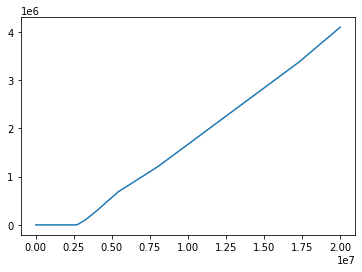

In [5]:
simulation = scenario.new_simulation()
pension_retraite_brut = simulation.calculate('pension_retraite_brut', period)
droit_progressif = simulation.calculate('droit_progressif', period)
plt.plot(
    pension_retraite_brut,
    droit_progressif,
    )

    

In [6]:
from openfisca_core.rates import marginal_rate


array([0.        , 0.02430069, 0.179995  , 0.18000525, 0.18000752,
       0.18666333, 0.1866883 , 0.19626379, 0.19787711, 0.19997501,
       0.19999498, 0.19999999, 0.20001996, 0.20002496, 0.20494503,
       0.21999252, 0.22000498, 0.23246753, 0.23329335, 0.23330504,
       0.23331666, 0.23332834, 0.23333001, 0.23333585, 0.23334163,
       0.23334748, 0.23335499, 0.23336661, 0.24120879, 0.24998748,
       0.2499969 , 0.25      , 0.25000936, 0.25001252, 0.2547952 ,
       0.26337415, 0.26660675, 0.2666334 , 0.26668334, 0.2667333 ,
       0.279988  , 0.27999502, 0.27999848, 0.2800005 , 0.28000402,
       0.28000748, 0.28001297, 0.28002   ], dtype=float32)

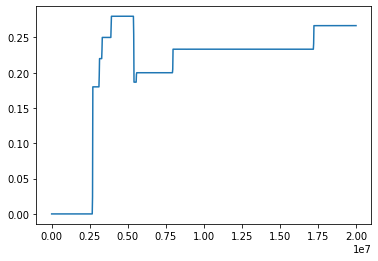

In [7]:
plt.plot(
    pension_retraite_brut[:-1],
    marginal_rate(pension_retraite_brut - droit_progressif, pension_retraite_brut)
    )
import numpy as np 
np.unique(marginal_rate(pension_retraite_brut - droit_progressif, pension_retraite_brut))

In [8]:
from openfisca_senegal.inversion import compute_bareme_retraite
adjusted_bareme = compute_bareme_retraite(scenario.tax_benefit_system.parameters, period, nombre_de_parts_value)

In [9]:
bareme = SenegalTaxBenfitSystem().parameters(period).prelevements_obligatoires.impots_directs.bareme_impot_progressif.copy()
print(bareme)
print('ajdusted')
print(adjusted_bareme)

/home/benjello/.virtualenvs/openfisca-ceq/local/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


  - threshold: 0.0
    rate: 0.0
  - threshold: 600000
    rate: 0.18
  - threshold: 890000
    rate: 0.22
  - threshold: 1010000
    rate: 0.25
  - threshold: 1410000
    rate: 0.28
  - threshold: 2475000
    rate: 0.3
  - threshold: 3540000
    rate: 0.35
  - threshold: 7650000
    rate: 0.4
  - threshold: 9650000
    rate: 0.45
  - threshold: 12650000
    rate: 0.5
ajdusted
  - threshold: 0
    rate: 0
  - threshold: 1800000.0
    rate: 0.18
  - threshold: 2090000.0
    rate: 0.22
  - threshold: 2210000.0
    rate: 0.25
  - threshold: 2610000.0
    rate: 0.28
  - threshold: 3600000.0000360003
    rate: 0.18666666666760004
  - threshold: 3712499.999981437
    rate: 0.20000000000100002
  - threshold: 5309999.99997345
    rate: 0.23333333333450001
  - threshold: 11474999.999942623
    rate: 0.26666666666800004
  - threshold: 14474999.999927623
    rate: 0.30000000000150007
  - threshold: 18974999.999905124
    rate: 0.33333333333500004


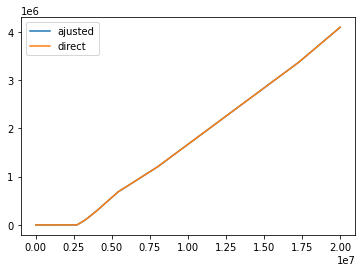

In [10]:
plt.plot(
    pension_retraite_brut,
    nombre_de_parts_value * adjusted_bareme.calc(pension_retraite_brut / nombre_de_parts_value),
    label = 'ajusted'
    )
plt.plot(
    pension_retraite_brut,
    droit_progressif,
    label = 'direct'
    )
plt.legend()

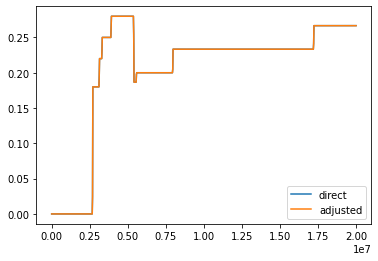

In [11]:
plt.plot(
    pension_retraite_brut[:-1],
    marginal_rate(pension_retraite_brut - droit_progressif, pension_retraite_brut),
    label = "direct")
plt.plot(
    pension_retraite_brut[:-1],
    marginal_rate(
        pension_retraite_brut - nombre_de_parts_value * adjusted_bareme.calc(pension_retraite_brut / nombre_de_parts_value), 
        pension_retraite_brut
        ),
    label = "adjusted"
    )
plt.legend()


In [12]:
pensio

NameError: name 'pensio' is not defined

In [ ]:
bareme

In [ ]:
bareme.bracket_indices()
